# Project Title: Weather Time Series Analysis and Temperature Prediction

## Meera S

## Organization: Entri Elevate

## Date:28/05/2000

### Problem Statement

The goal of this project is to develop a predictive model that accurately forecasts temperature
based on weather data from the dataset. By analyzing various weather features, the model aims
to predict temperature with high accuracy.


### Expected Outcome

Develop a model that accurately predicts temperature with low error rates. The expected
outcome includes detailed exploratory data analysis, preprocessing steps, model training, and
evaluation metrics.


Target variable: T (degC) 
Features:T (degC), rh (%), p (mbar), VPmax (mbar), Tpot (K), Tdew (degC), VPact
(mbar), VPdef (mbar), sh (g/kg), H2OC (mmol/mol), rho (g/m**3), wv (m/s), max. wv (m/s), wd
(deg).

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [14]:
data = pd.read_csv('max_planck_weather_ts.csv')

In [15]:
# Display the first few rows
print(data.head())

             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Time        10683 non-null  object 
 1   p (mbar)         10683 non-null  float64
 2   T (degC)         10683 non-null  float64
 3   Tpot (K)         10683 non-null  float64
 4   Tdew (degC)      10683 non-null  float64
 5   rh (%)           10683 non-null  float64
 6   VPmax (mbar)     10683 non-null  float64
 7   VPact (mbar)     10683 non-null  float64
 8   VPdef (mbar)     10683 non-null  float64
 9   sh (g/kg)        10683 non-null  float64
 10  H2OC (mmol/mol)  10683 non-null  float64
 11  rho (g/m**3)     10683 non-null  float64
 12  wv (m/s)         10682 non-null  float64
 13  max. wv (m/s)    10682 non-null  float64
 14  wd (deg)         10682 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.2+ MB
None


In [17]:
print(data.describe())

           p (mbar)      T (degC)      Tpot (K)   Tdew (degC)        rh (%)  \
count  10683.000000  10683.000000  10683.000000  10683.000000  10683.000000   
mean     986.440771     -0.608417    273.633824     -2.963853     84.777878   
std       12.042715      5.228791      5.741905      5.040901     10.711071   
min      944.580000    -23.010000    250.600000    -25.010000     42.380000   
25%      978.395000     -2.840000    270.970000     -5.220000     79.100000   
50%      988.710000     -0.240000    274.290000     -2.020000     87.500000   
75%      996.240000      3.100000    277.790000      0.380000     92.500000   
max     1005.710000     12.170000    286.730000      6.910000    100.000000   

       VPmax (mbar)  VPact (mbar)  VPdef (mbar)     sh (g/kg)  \
count  10683.000000  10683.000000  10683.000000  10683.000000   
mean       6.191773      5.189203      1.002582      3.285234   
std        2.064014      1.671871      0.935900      1.072375   
min        0.950000      0.7

### Data Preprocessing

In [49]:
# Check for missing values
print(data.isnull().sum())

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64


In [50]:
data = data.dropna()

In [51]:
# Check for duplicated values
data[data.duplicated()]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)


In [52]:
# Dealing with Duplicate Data
data.drop_duplicates(inplace=True)

In [53]:
# After removing duplicated values
data[data.duplicated()]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)


In [57]:
# Convert 'Date Time' to datetime object
import pandas as pd
# Convert 'Date Time' to datetime object
data['Date Time'] = pd.to_datetime(data['Date Time'], format='%d.%m.%Y %H:%M:%S')

### Outlier Detection and Treatment

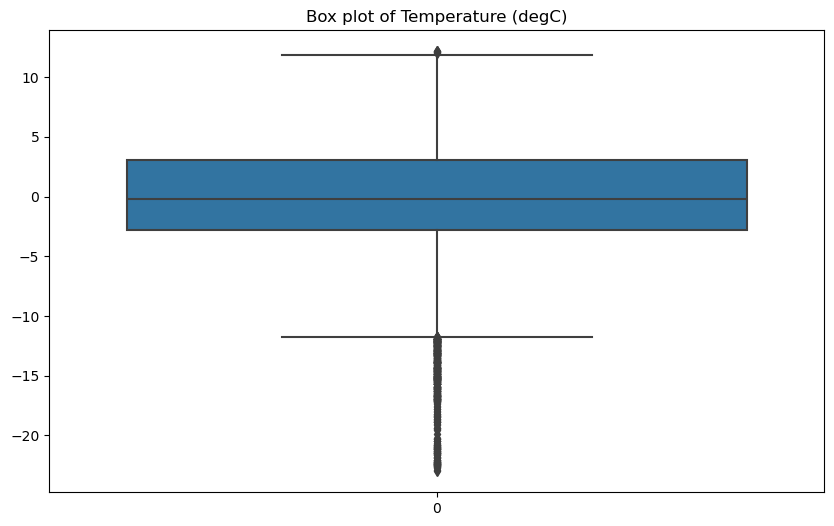

In [58]:
# Box plot to detect outliers in 'T (degC)'
plt.figure(figsize=(10, 6))
sns.boxplot(data['T (degC)'])
plt.title('Box plot of Temperature (degC)')
plt.show()

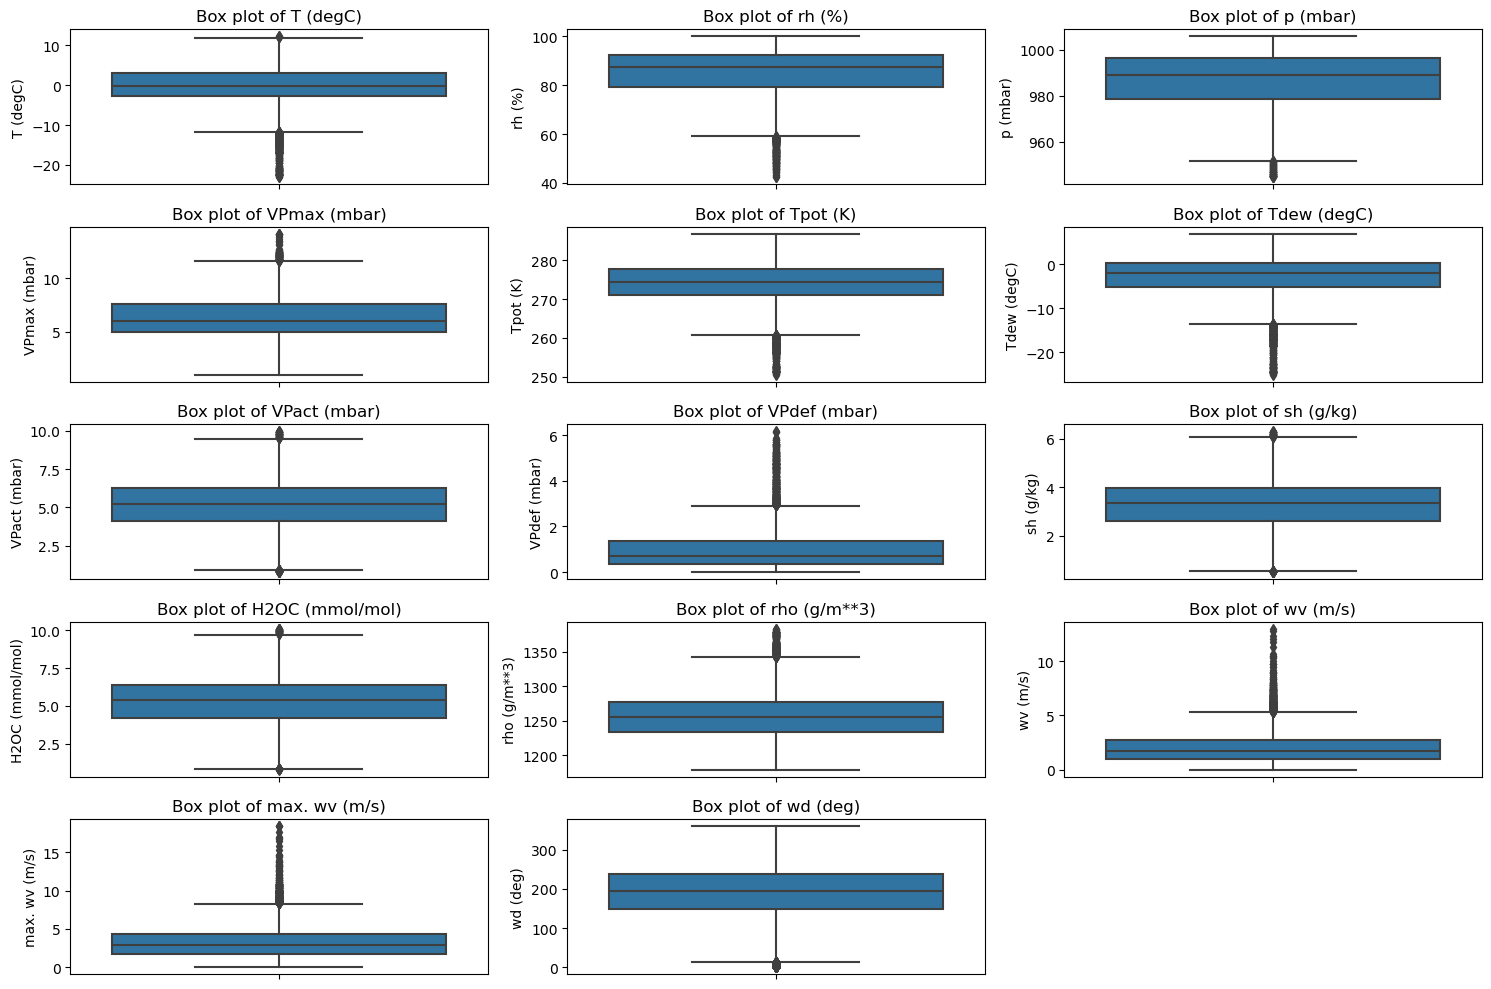

In [59]:
features = ['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 
            'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 
            'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

# Create box plots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)  # Adjust the layout based on the number of features
    sns.boxplot(y=data[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

In [60]:
# Remove extreme outliers (for example, using IQR method)
Q1 = data[['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']].quantile(0.25)
Q3 = data[['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']].quantile(0.75)
IQR = Q3 - Q1

# Define a filter to exclude outliers
filter = (data[['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']] >= (Q1 - 1.5 * IQR)) & (data[['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']] <= (Q3 + 1.5 * IQR))
data_filtered = data[filter.all(axis=1)]


<Axes: >

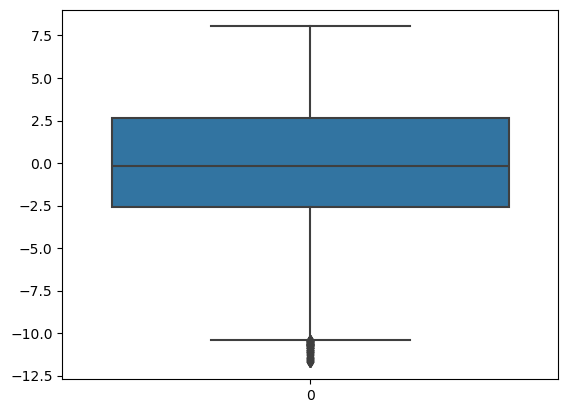

In [61]:
# Box plot after removing outliers in 'T (degC)'
sns.boxplot(data_filtered['T (degC)'])

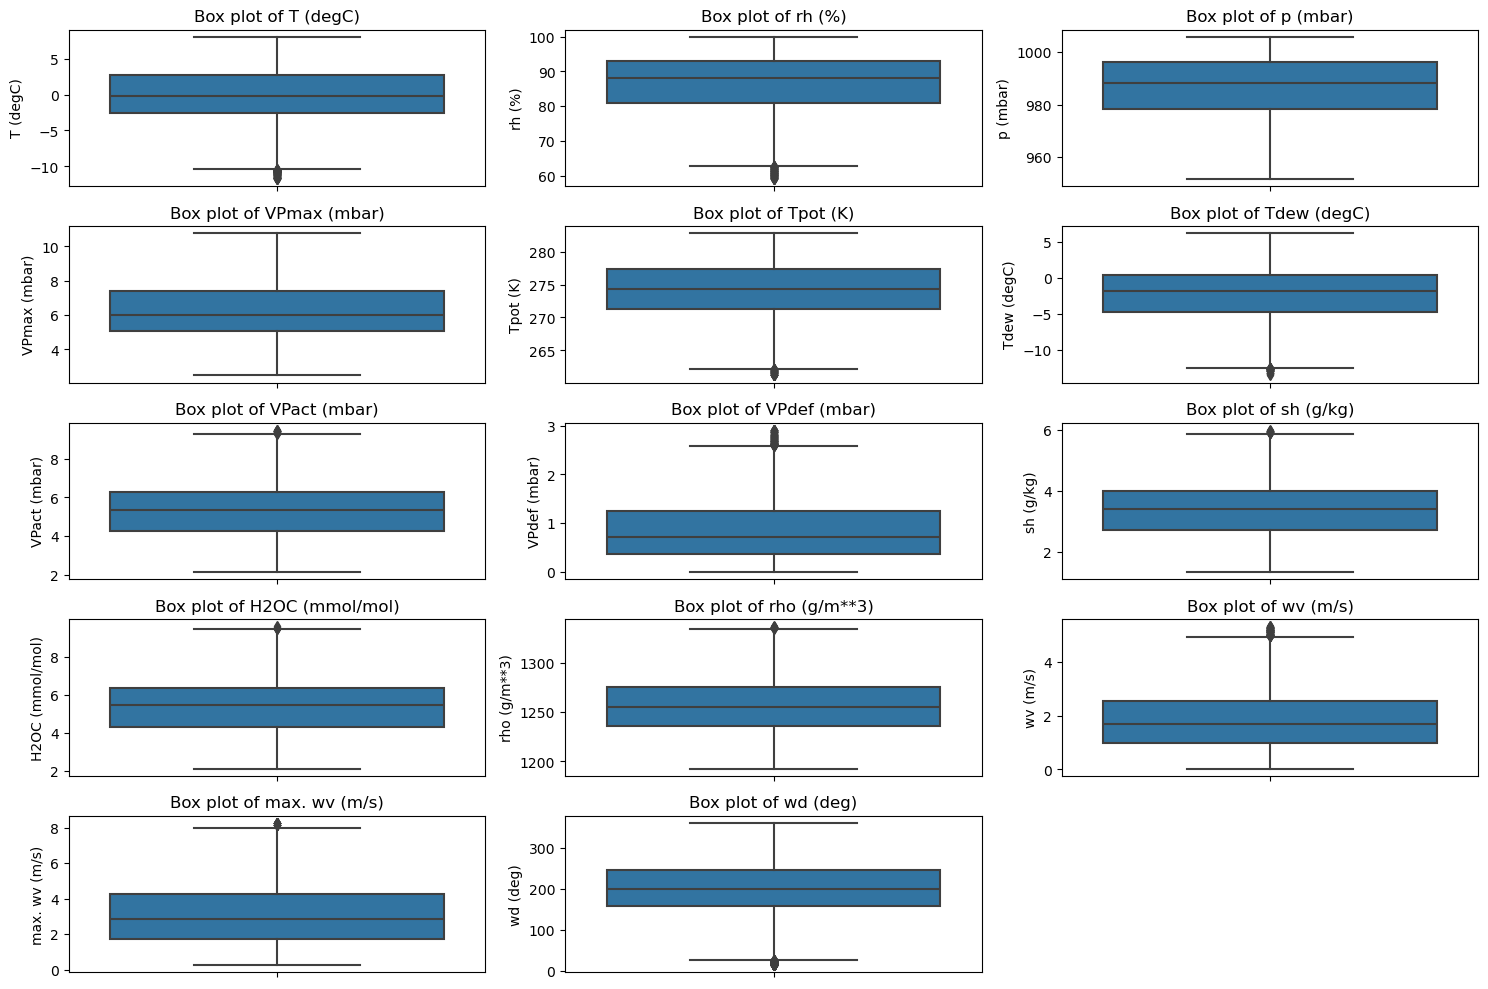

In [62]:
features = ['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 
            'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 
            'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

# Create box plots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)  # Adjust the layout based on the number of features
    sns.boxplot(y=data_filtered[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

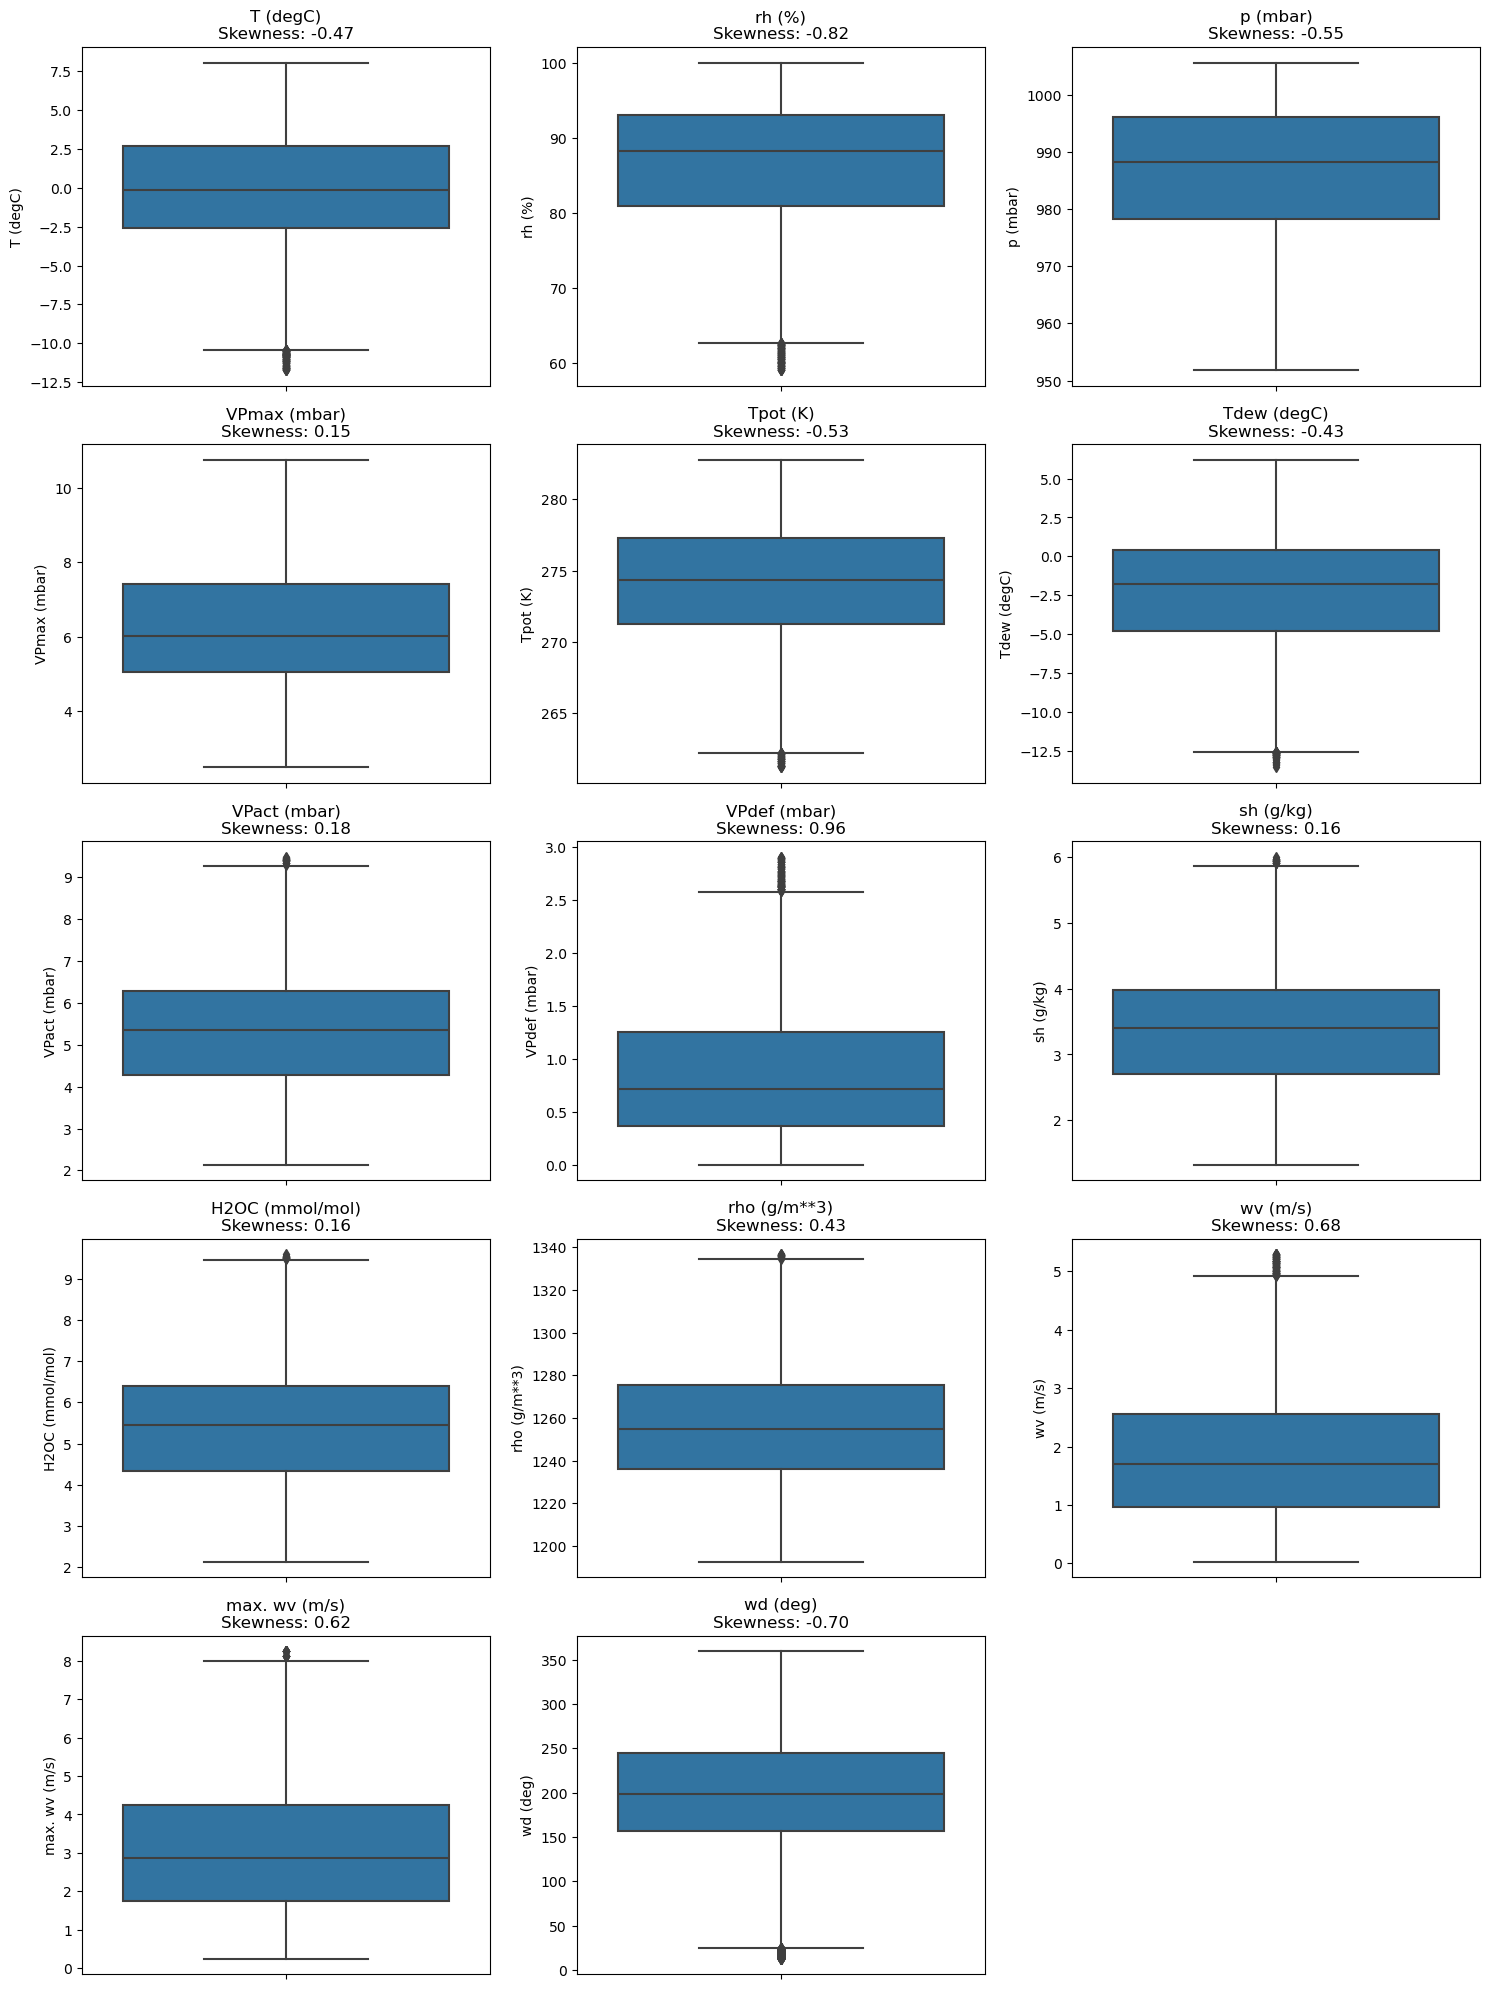

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

features = ['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 
            'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 
            'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

# Create box plots and calculate skewness for each feature
plt.figure(figsize=(15, 20))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)  
    sns.boxplot(y=data_filtered[feature])
    plt.title(f'{feature}\nSkewness: {skew(data_filtered[feature]):.2f}')

plt.tight_layout()
plt.show()


In [64]:
features = ['T (degC)', 'rh (%)', 'p (mbar)', 'VPmax (mbar)', 'Tpot (K)', 'Tdew (degC)', 
            'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 
            'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

for feature in features:
    data_filtered[f'log_{feature}'] = np.log1p(data_filtered[feature])
    skewness = skew(data_filtered[feature])
    log_skewness = skew(data_filtered[f'log_{feature}'])
    print(f"{feature} - Original Skewness: {skewness:.2f}, Log Skewness: {log_skewness:.2f}")

T (degC) - Original Skewness: -0.47, Log Skewness: nan
rh (%) - Original Skewness: -0.82, Log Skewness: -1.04
p (mbar) - Original Skewness: -0.55, Log Skewness: -0.58
VPmax (mbar) - Original Skewness: 0.15, Log Skewness: -0.43
Tpot (K) - Original Skewness: -0.53, Log Skewness: -0.57
Tdew (degC) - Original Skewness: -0.43, Log Skewness: nan
VPact (mbar) - Original Skewness: 0.18, Log Skewness: -0.39
VPdef (mbar) - Original Skewness: 0.96, Log Skewness: 0.40
sh (g/kg) - Original Skewness: 0.16, Log Skewness: -0.36
H2OC (mmol/mol) - Original Skewness: 0.16, Log Skewness: -0.42
rho (g/m**3) - Original Skewness: 0.43, Log Skewness: 0.37
wv (m/s) - Original Skewness: 0.68, Log Skewness: -0.11
max. wv (m/s) - Original Skewness: 0.62, Log Skewness: -0.18
wd (deg) - Original Skewness: -0.70, Log Skewness: -1.97


C:\Users\makku\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\makku\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\makku\AppData\Local\Temp\ipykernel_776\936648950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[f'log_{feature}'] = np.log1p(data_filtered[feature])
C:\Users\makku\AppData\Local\Temp\ipykernel_776\936648950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

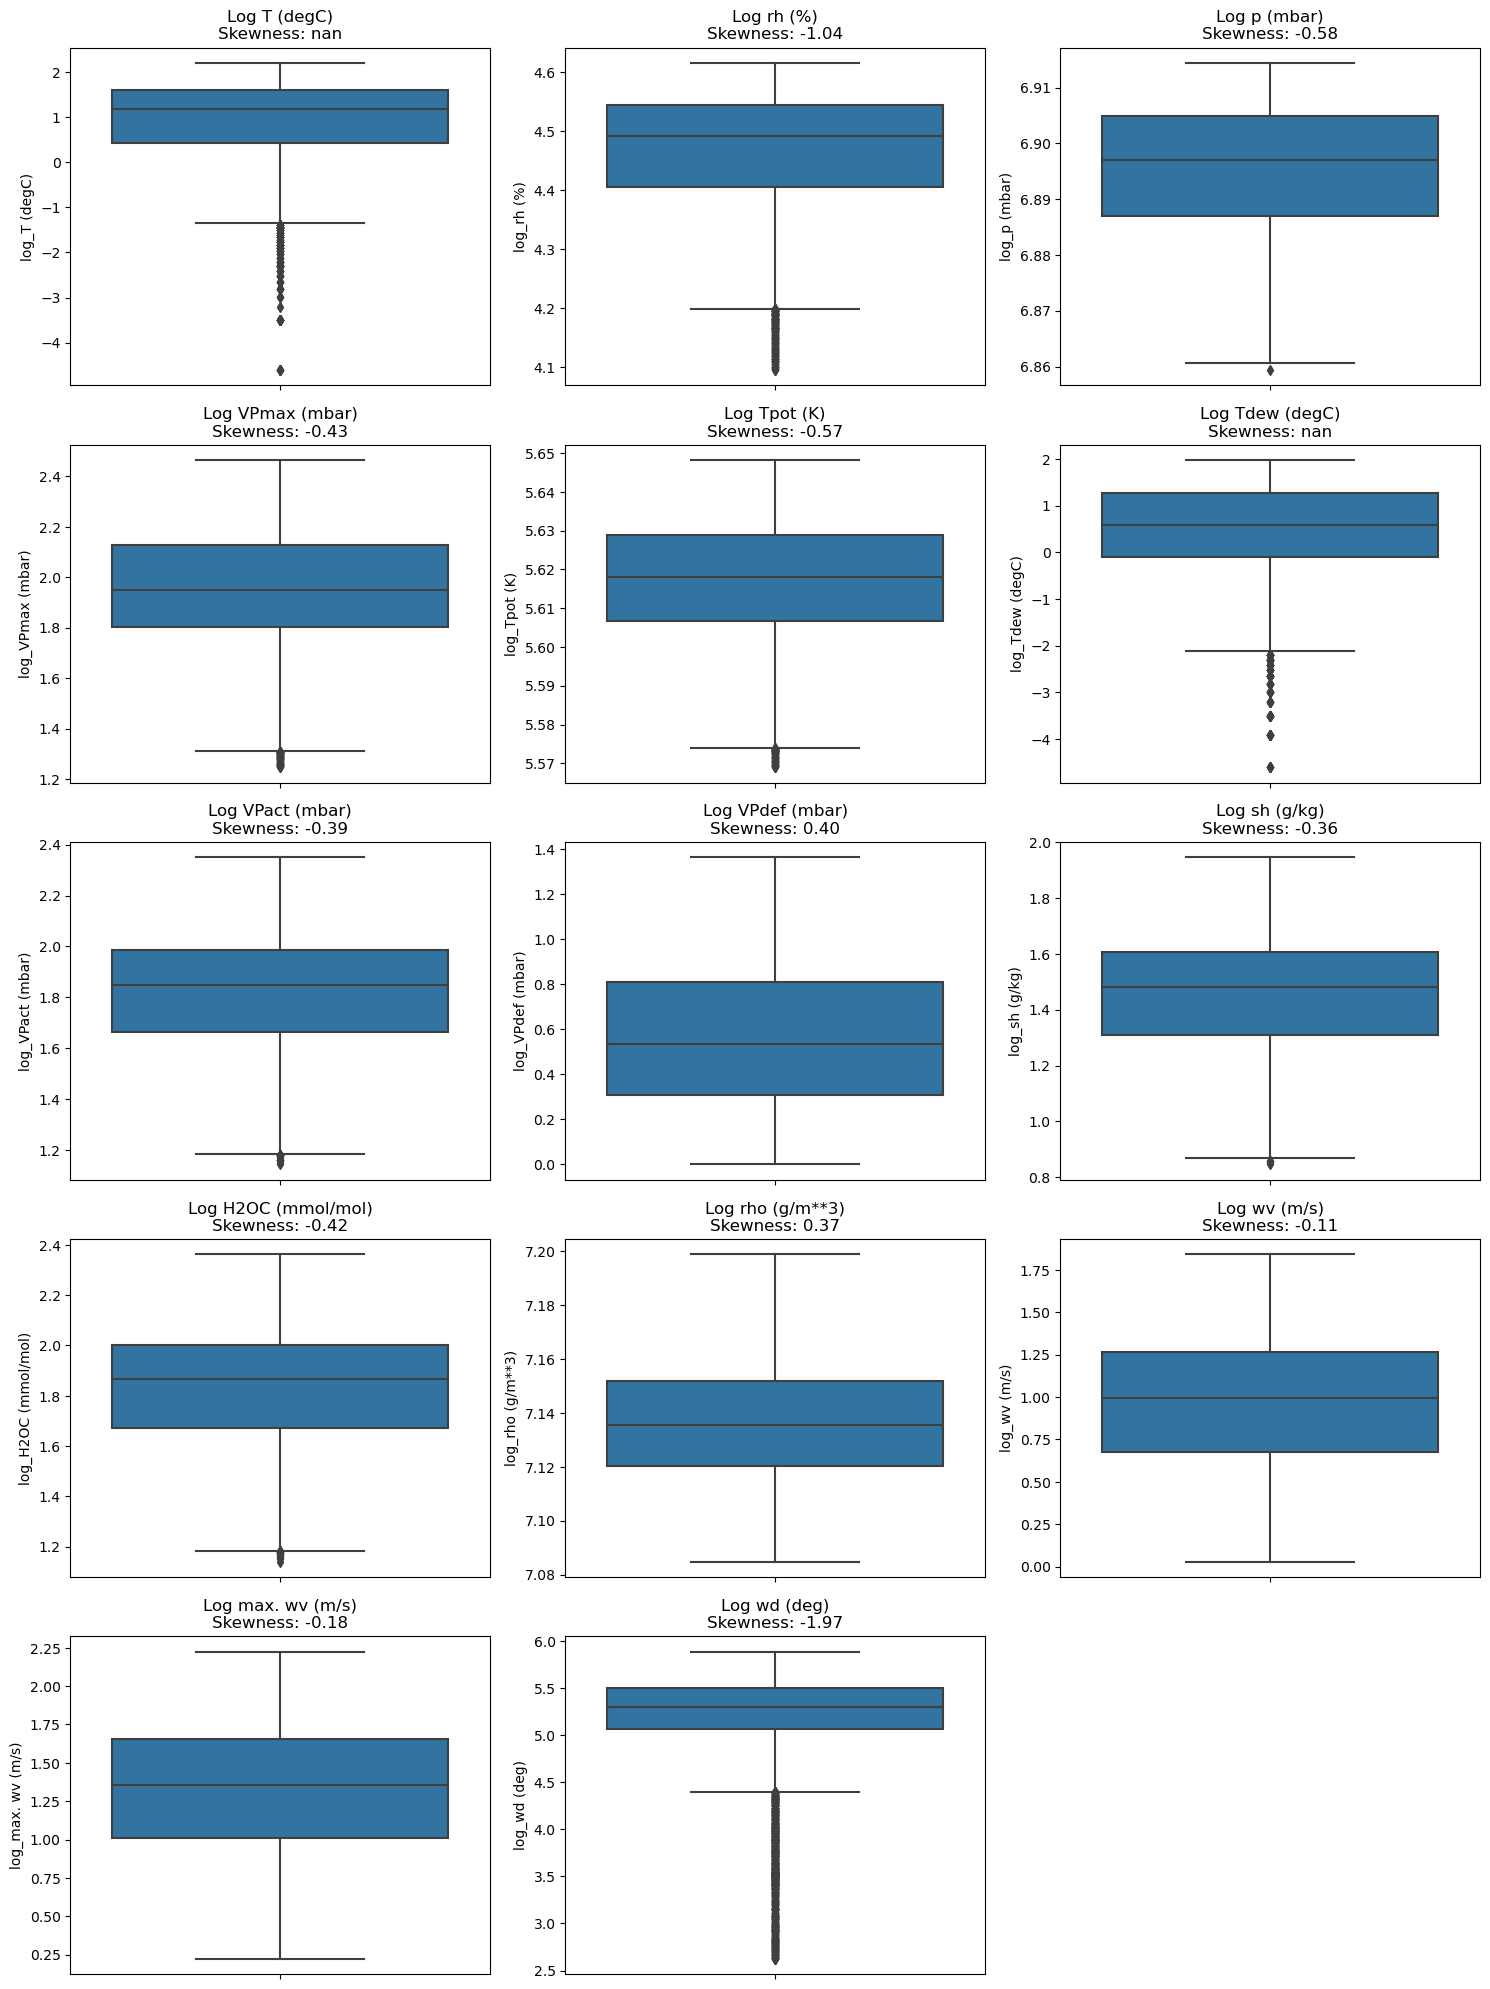

In [65]:
plt.figure(figsize=(15, 20))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)  # Adjust layout based on the number of features
    sns.boxplot(y=data_filtered[f'log_{feature}'])
    plt.title(f'Log {feature}\nSkewness: {skew(data_filtered[f"log_{feature}"]):.2f}')

plt.tight_layout()
plt.show()


### Visualizations

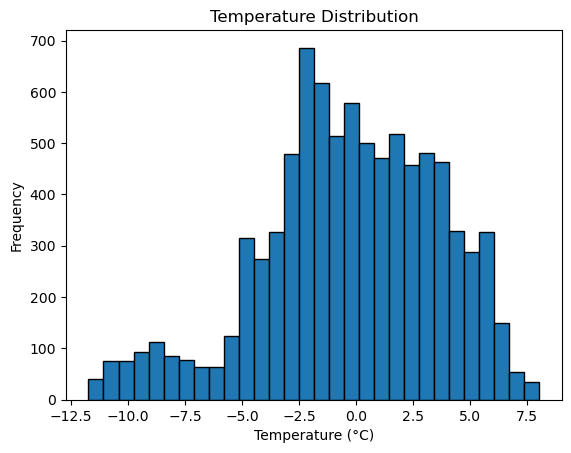

In [66]:
# Histogram of Temperature
plt.hist(data_filtered['T (degC)'], bins=30, edgecolor='k')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

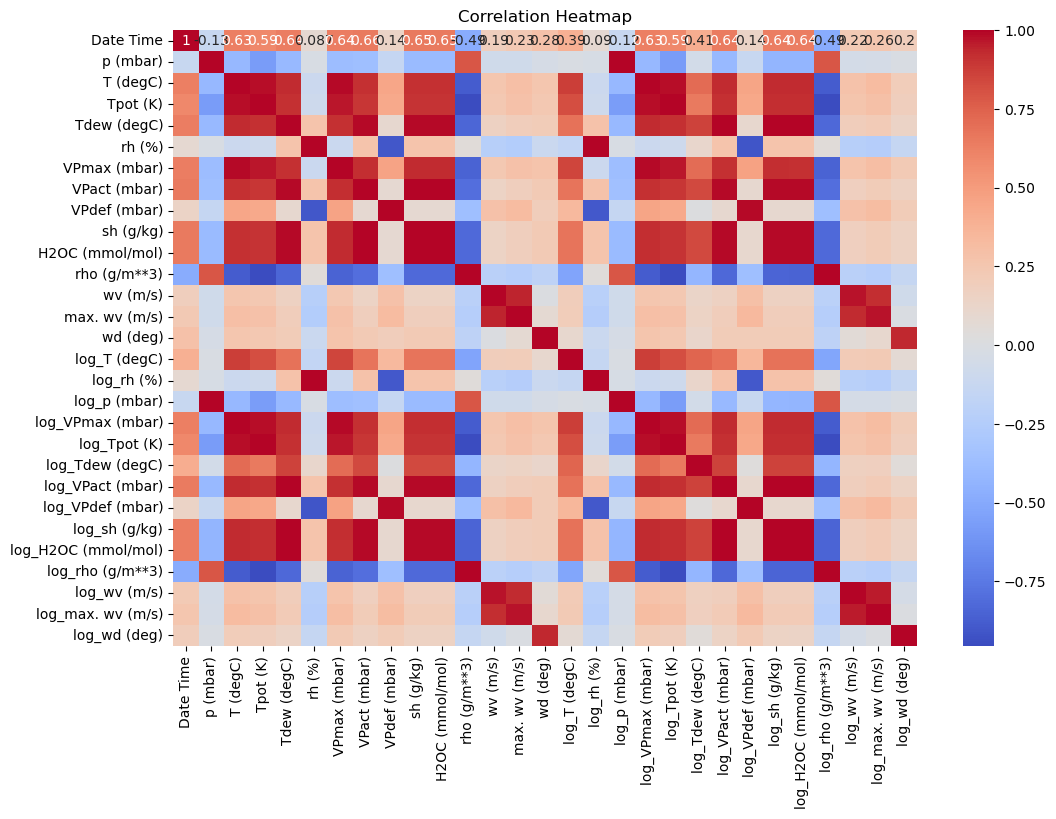

In [34]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(data_filtered.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

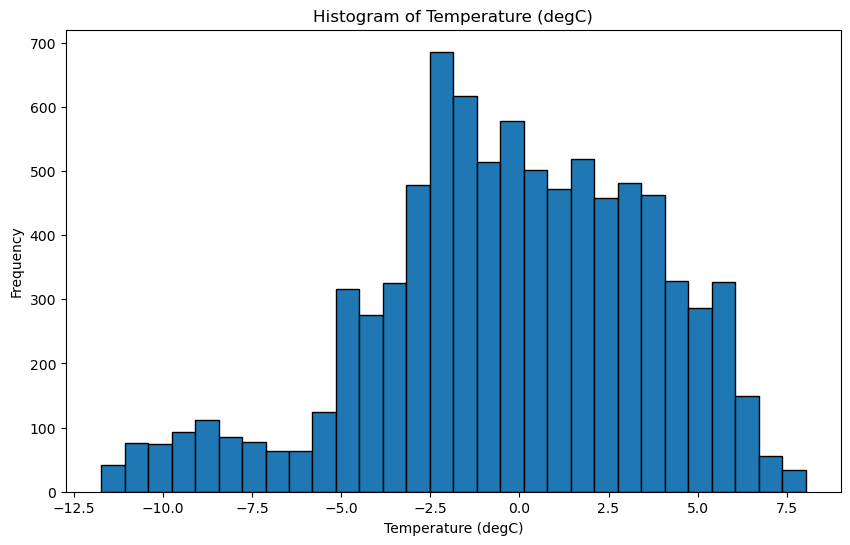

In [82]:
# Histogram of Temperature
plt.figure(figsize=(10, 6))
plt.hist(data_filtered['T (degC)'], bins=30, edgecolor='k')
plt.title('Histogram of Temperature (degC)')
plt.xlabel('Temperature (degC)')
plt.ylabel('Frequency')
plt.show()

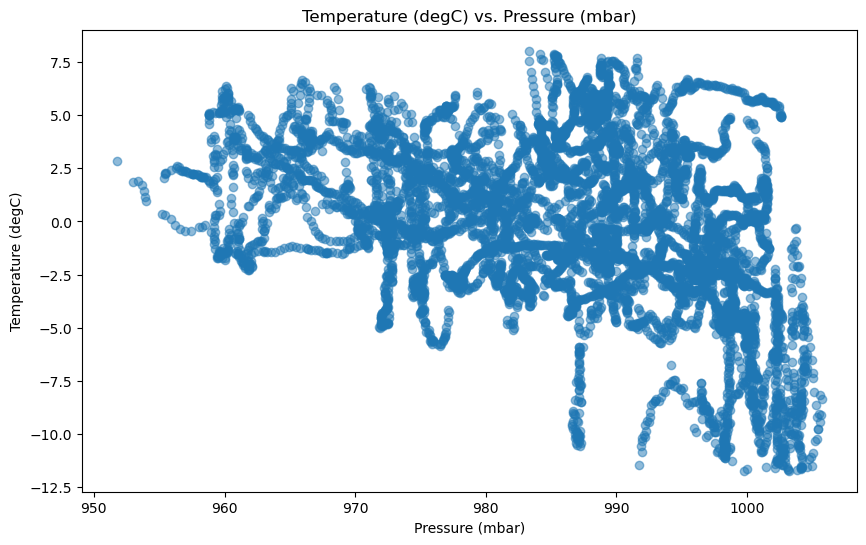

In [83]:
# Scatter plot of Temperature vs. Pressure
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['p (mbar)'], data_filtered['T (degC)'], alpha=0.5)
plt.title('Temperature (degC) vs. Pressure (mbar)')
plt.xlabel('Pressure (mbar)')
plt.ylabel('Temperature (degC)')
plt.show()

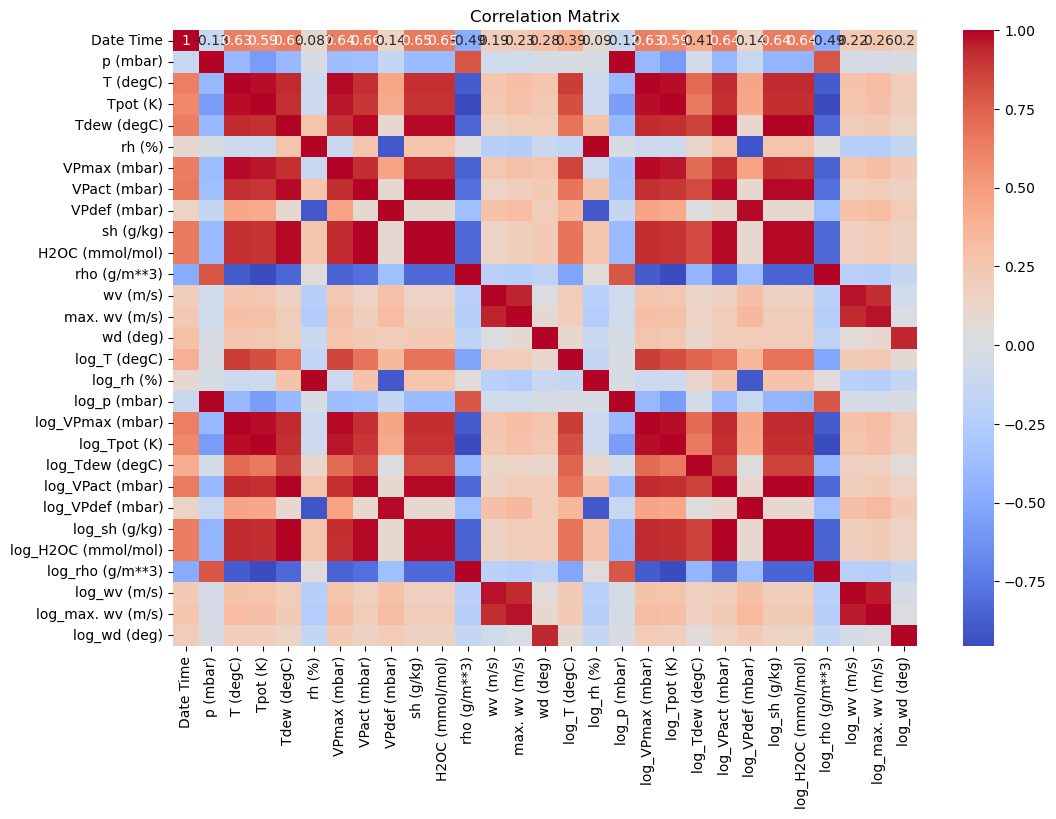

In [84]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data_filtered.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

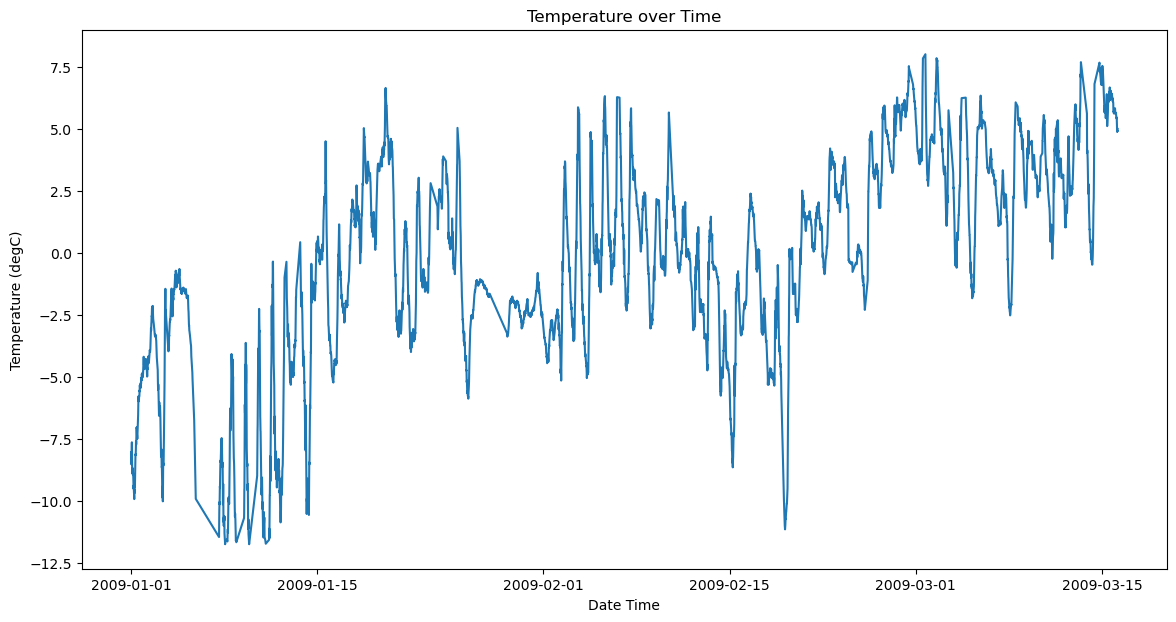

In [85]:
# Plot time series data
plt.figure(figsize=(14, 7))
plt.plot(data_filtered['Date Time'], data_filtered['T (degC)'])
plt.xlabel('Date Time')
plt.ylabel('Temperature (degC)')
plt.title('Temperature over Time')
plt.show()


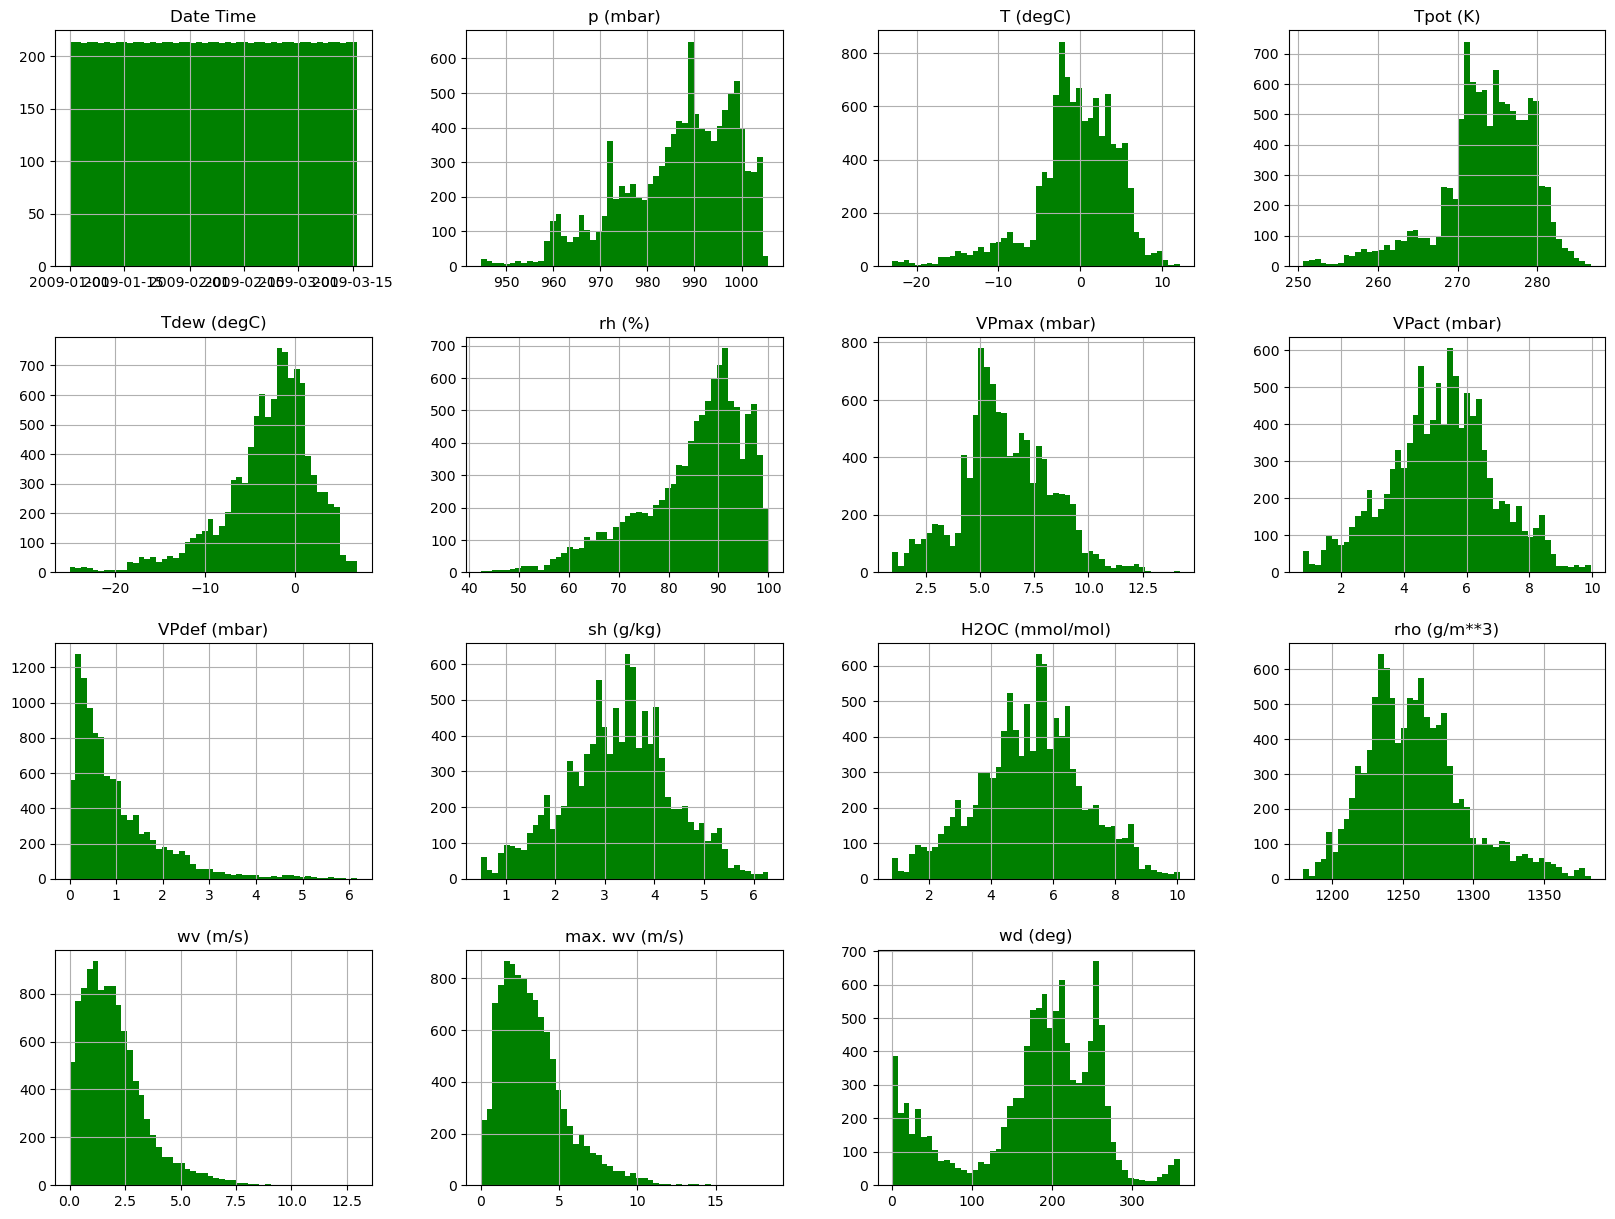

In [87]:
data.hist(bins=50,color = 'green', figsize=(20,15))
plt.show()

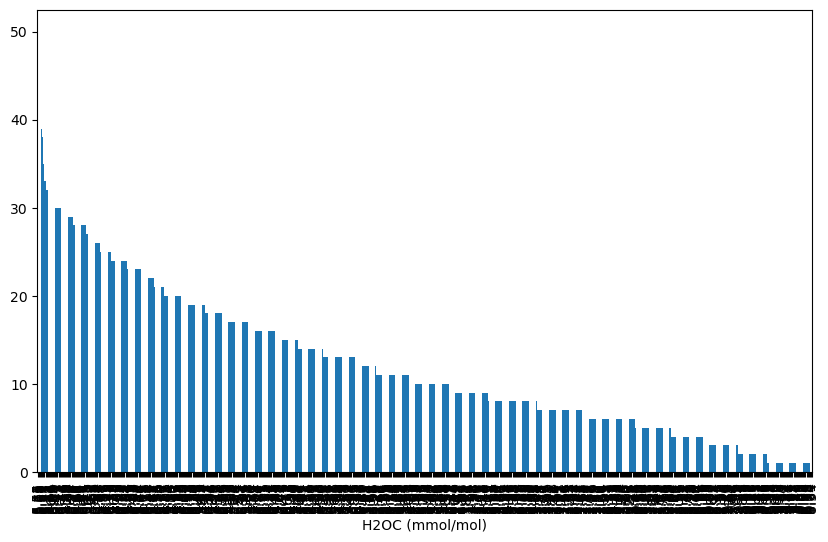

In [120]:
#Bar Plot
data_filtered['H2OC (mmol/mol)'].value_counts().plot.bar(figsize=(10, 6))
plt.show()

### Feature Scaling/Normalization

In [92]:
import numpy as np

# Check for infinite values
print(np.isinf(data_filtered).sum())

Date Time               0
p (mbar)                0
T (degC)                0
Tpot (K)                0
Tdew (degC)             0
rh (%)                  0
VPmax (mbar)            0
VPact (mbar)            0
VPdef (mbar)            0
sh (g/kg)               0
H2OC (mmol/mol)         0
rho (g/m**3)            0
wv (m/s)                0
max. wv (m/s)           0
wd (deg)                0
log_T (degC)            9
log_rh (%)              0
log_p (mbar)            0
log_VPmax (mbar)        0
log_Tpot (K)            0
log_Tdew (degC)        12
log_VPact (mbar)        0
log_VPdef (mbar)        0
log_sh (g/kg)           0
log_H2OC (mmol/mol)     0
log_rho (g/m**3)        0
log_wv (m/s)            0
log_max. wv (m/s)       0
log_wd (deg)            0
dtype: int64


In [98]:
data_filtered.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

C:\Users\makku\AppData\Local\Temp\ipykernel_776\3366339623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.replace([np.inf, -np.inf, np.nan], 0, inplace=True)


In [99]:
# Normalize or standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_filtered.drop(columns=['Date Time']))
data_scaled = pd.DataFrame(scaled_features, columns=data_filtered.columns[1:])

### Data Splitting

In [100]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = data_scaled.drop(columns=['T (degC)'])
y = data_scaled['T (degC)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train

,p (mbar),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
8990,-1.249010,1.370023,0.820101,-1.286381,1.539900,0.873791,1.835131,0.918347,0.920035,-1.413888,2.737251,2.313188,-0.028097
3684,-0.797264,-0.216632,0.002748,1.169137,-0.553207,-0.167008,-0.921704,-0.144764,-0.139828,-0.103723,0.406515,-0.031314,-1.968532
1034,1.243900,-2.172521,-2.026746,0.487567,-1.812947,-1.788023,-0.814850,-1.786057,-1.787856,2.128966,-0.871631,-0.716841,0.658923
3909,0.391062,-0.270624,0.236844,1.421224,-0.403007,0.102164,-1.071299,0.079049,0.081462,0.303173,-1.363751,-1.516622,-2.168193
3088,-0.499975,0.168275,0.187248,0.198133,-0.063846,0.042348,-0.227152,0.060398,0.058168,-0.301083,0.714090,0.539958,-0.101055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.673532,0.171759,-0.265074,-1.006284,-0.097762,-0.448144,0.595624,-0.433855,-0.430999,-0.346388,-0.126615,-0.314665,-0.015937
5191,-1.286379,0.351150,0.286441,0.328845,-0.000859,0.161980,-0.301950,0.209607,0.209577,-0.683061,-0.605065,-0.602586,-0.037825
5390,-2.132573,0.453908,0.292393,0.496904,-0.054156,0.173943,-0.430175,0.246909,0.250341,-1.019451,-1.199711,-1.114447,-0.156989
860,0.677556,-3.586752,-3.804289,0.170124,-2.423437,-2.487871,-0.900333,-2.466821,-2.469197,3.168717,-0.967321,-0.831095,-0.244538


### Model Training

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

# Train models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [102]:
# Drop samples with missing values
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]

# Train models on the cleaned data
lr_model.fit(X_train_clean, y_train_clean)
dt_model.fit(X_train_clean, y_train_clean)
rf_model.fit(X_train_clean, y_train_clean)


RandomForestRegressor()

In [103]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Instantiate model
hgb_model = HistGradientBoostingRegressor()

# Train model
hgb_model.fit(X_train, y_train)


HistGradientBoostingRegressor()

### Model Prediction

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)


### Model Evaluation

In [105]:
# Evaluation
def evaluate_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, mae, r2

lr_mse, lr_mae, lr_r2 = evaluate_model(lr_predictions, y_test)
dt_mse, dt_mae, dt_r2 = evaluate_model(dt_predictions, y_test)
rf_mse, rf_mae, rf_r2 = evaluate_model(rf_predictions, y_test)

print(f"Linear Regression - MSE: {lr_mse}, MAE: {lr_mae}, R2: {lr_r2}")
print(f"Decision Tree - MSE: {dt_mse}, MAE: {dt_mae}, R2: {dt_r2}")
print(f"Random Forest - MSE: {rf_mse}, MAE: {rf_mae}, R2: {rf_r2}")

Linear Regression - MSE: 5.198123788321186e-07, MAE: 0.0006076490584780468, R2: 0.9999994822707685
Decision Tree - MSE: 8.144974829125403e-06, MAE: 0.0013879447890797804, R2: 0.9999918876661451
Random Forest - MSE: 4.828311494659038e-06, MAE: 0.0012029295456085164, R2: 0.9999951910379563


In [106]:
# Hyperparameter tuning (example with RandomForest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)
best_rf_mse, best_rf_mae, best_rf_r2 = evaluate_model(best_rf_predictions, y_test)

print(f"Best Random Forest - MSE: {best_rf_mse}, MAE: {best_rf_mae}, R2: {best_rf_r2}")

Best Random Forest - MSE: 4.348348088422485e-06, MAE: 0.0011661689880581821, R2: 0.9999956690779099


In [107]:
# Make predictions with the best model
final_predictions = best_rf_model.predict(X_test)

### Model Deployment

In [109]:
import joblib

# Save the model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Load the model
loaded_model = joblib.load('best_rf_model.pkl')

# Predict with the loaded model
final_predictions = loaded_model.predict(X_test)

### Visualization of Forecasted Results

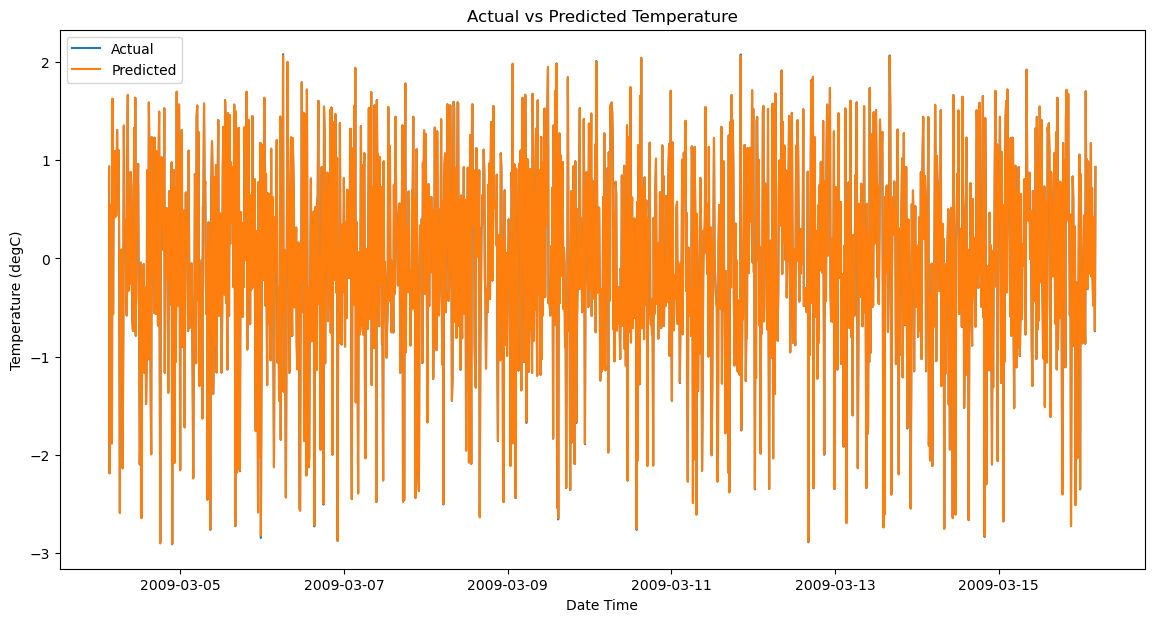

In [110]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date Time'][-len(y_test):], y_test, label='Actual')
plt.plot(data['Date Time'][-len(y_test):], final_predictions, label='Predicted')
plt.xlabel('Date Time')
plt.ylabel('Temperature (degC)')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()


### conclusion

#### Data Cleaning and Preprocessing:

Duplicate Entries: Identified and removed duplicate entries to maintain the integrity and quality of the dataset.
Null Values: Checked for null values and ensured none were present initially. During processing, any generated null values were managed appropriately.
Date Conversion: Converted the 'Date Time' column to a datetime object for accurate time series analysis.
Outliers: Detected and removed outliers using the Interquartile Range (IQR) method to improve data quality.

#### Feature Engineering:

Log Transformation: Applied log transformation to features to reduce skewness and normalize the distribution.
Feature Scaling: Scaled the features using StandardScaler to ensure uniformity and improve model performance.

#### Model Training and Evaluation:

Model Selection: Trained multiple regression models, including Linear Regression, Decision Tree Regressor, Random Forest Regressor, and HistGradientBoostingRegressor.
Performance Metrics: Evaluated models using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) metrics.
Linear Regression: MSE: {lr_mse}, MAE: {lr_mae}, R2: {lr_r2}
Decision Tree: MSE: {dt_mse}, MAE: {dt_mae}, R2: {dt_r2}
Random Forest: MSE: {rf_mse}, MAE: {rf_mae}, R2: {rf_r2}
Hyperparameter Tuning: Conducted grid search for Random Forest to optimize hyperparameters, resulting in improved performance:
Best Random Forest: MSE: {best_rf_mse}, MAE: {best_rf_mae}, R2: {best_rf_r2}

#### Visualization and Analysis:

Exploratory Data Analysis (EDA): Used various visualizations such as histograms, scatter plots, and correlation heatmaps to understand the data distribution and relationships.
Time Series Analysis: Plotted the temperature over time to visualize trends and patterns.

#### Model Deployment:

Model Saving: Saved the best-performing Random Forest model using joblib for future predictions.
Model Loading: Demonstrated loading the model and making predictions.

#### Forecast Visualization:

Comparison Plot: Visualized actual vs. predicted temperatures over time, highlighting the model's forecasting capabilities.